In [1]:
#Q1)  학습된 모델 확인 tf.keras.applications.VGG16
import tensorflow as tf
import pprint 

In [2]:
#1-1  모델 확인  
model  = tf.keras.applications.VGG16( weights=None ) #CNN 구조를 가진 분류모델
model.summary()



Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [3]:
#1-2  모델의  name을 지정해서 레이어 대상의 오브젝트를  get_layer()로 리턴  
res = model.get_layer('block4_conv1')
print(res)
print(type(res))

<class 'keras.src.layers.convolutional.conv2d.Conv2D'>


In [4]:
#1-3 인덱스로 레이어 객체를 가지고 오자.  
res01 = model.get_layer(index=11)
print(res01)
print(type(res01))
print(res  is  res01 )

#1-4  -인덱스도 사용해서 layers.name의 속성을 사용해 보자. 
print(model.get_layer(index = -1).name)
print(model.get_layer(index = -3).name)

<class 'keras.src.layers.convolutional.conv2d.Conv2D'>
True
predictions
fc1


In [5]:
#1-5  model.layers를 이용해서 모델이 가진 레이어 객체의 목록을 보자.  
pprint.pprint(model.layers)
print(type(model.layers))
print(model.layers[11])

print(model.layers[-1].name)
print(model.layers[-3].name)

<class 'list'>
predictions
fc1


In [6]:
#Q2 ) 레이어 객체의 속성 및 메소드를 확인  
#2-1 레이어 인스턴스를 확인 해보자. 
layer01 = model. get_layer(index =1)
print(layer01)
print(isinstance(layer01,tf.keras.layers.Layer ))

True


In [7]:
#2-2 . name으로 레이어이름을 리턴하고 count_params() 메소드로 파라미터 수 리턴
print(layer01.name)
print(layer01.count_params())

block1_conv1
1792


In [8]:
#2-3. trainable 속성으로 레이어를 학습 유(학습에 의한 값을 갱신할까), 무를 설정   
#학습이 끝난 모델을 사용한 전이 학습에 있어서 원하는 레이어만 학습 유무를 지정할 때  사용  
print(layer01.trainable)
layer01.trainable = False
print(layer01.trainable) 

True
False


In [9]:
#2-4 레이어 이름을 변경 해보자 . 
layer01._name = 'new_lock1_conv1'
print(layer01.name)

new_lock1_conv1


In [10]:
#Q3)조건을 만족 하는 레이어 오브젝트 취득, 설정, 변경 
#3-1. 리스트 객체를 사용해서 전체 레이어를 출력 조건추가  
my_pool   =  [ l for l in model.layers if 'pool' in l.name] 
pprint.pprint(my_pool) 

In [11]:
#3-2 레이어의 종류를 클래스로 지정해서 추출 해보자. 
my_pool   =  [ l for l in model.layers if isinstance(l , tf.keras.layers.MaxPooling2D)    ] 
pprint.pprint(my_pool) 

In [12]:
#3-3 레이어의 종류를 클래스를 여러개로  지정해서 추출 해보자. 
my_pool   =  [ l for l in model.layers if isinstance(l , (tf.keras.layers.MaxPooling2D,tf.keras.layers.Dense))] 
pprint.pprint(my_pool) 

In [13]:
#3-4. 범위를 지정해서 레이어를 리턴받을 수 있다. 
my_tail  = model.layers[-5:]
pprint.pprint(my_tail)

In [14]:
#3-5.원하는 레이어의 학습 속성을 일괄적으로 변경하고 싶다.  
for l in model.layers: 
    if isinstance(l,tf.keras.layers.Dense ):
        l.trainable = False 

In [15]:
#3-6. 끝에서 5개의 레이어의 속성을 변경하고 싶다. 
for l in model.layers[-5:]:  
    l.trainable = False 

In [16]:
#Q4) 임의의모델을 선언하자 .
# Conv2D  ->Flatten -> Dense -> Dense -> BatchNormalization  
model  = tf.keras.Sequential ([ 
          tf.keras.layers.Conv2D (1,(3,3), padding = 'same' , 
                       name = 'L0_conv2d' ,  input_shape = (10,10,1)),
          tf.keras.layers.Flatten ( name = 'L1_flatten' ),
          tf.keras.layers.Dense ( 10 , name = 'L2_dense' , use_bias = False ) , 
          tf.keras.layers.Dense ( 1 , name = 'L3_dense' ) ,
          tf.keras.layers.BatchNormalization()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L0_conv2d (Conv2D)          (None, 10, 10, 1)         10        
                                                                 
 L1_flatten (Flatten)        (None, 100)               0         
                                                                 
 L2_dense (Dense)            (None, 10)                1000      
                                                                 
 L3_dense (Dense)            (None, 1)                 11        
                                                                 
 batch_normalization (Batch  (None, 1)                 4         
 Normalization)                                                  
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1023 (4.00 KB)
Non-trainable params: 2 (8.00 Byte)
________________________

In [17]:
#Q5) 모델의 레이어 파라미터  (가중치, 바이어스 ) 리턴을 받자  
#5-1 get_weights()    
layer02= model.layers[3]
print( type(layer02.get_weights()) , len(layer02.get_weights()))
layer02.get_weights()   #[커널의 가중치 , 바이어스 값  ]  -> 가중치는 무작위 초기값을 가진다. 
print('가중치  :',  layer02.get_weights()[0] )
print('바이어스 :', layer02.get_weights()[1] )


<class 'list'> 2
가중치  : [[ 0.572301  ]
 [ 0.5522792 ]
 [-0.22499406]
 [-0.26832846]
 [ 0.6033816 ]
 [ 0.45041972]
 [-0.30718997]
 [-0.11747164]
 [ 0.58362633]
 [ 0.00604779]]
바이어스 : [0.]


In [18]:
#5-2 전체 레이어의 get_weights()  가 리턴하는 요소 수를 출력 해보자.  
for  i in model.layers:
    print(f'{i.name } \t {len(i.get_weights())}')

L0_conv2d 	 2
L1_flatten 	 0
L2_dense 	 1
L3_dense 	 2
batch_normalization 	 4


In [19]:
#5-3 #layer02.weights   -> list -> 각 속성은  ResourceVariable 리턴  <- tf.Variable name, shape속성등을 가진다.  
#L3_dense (Dense)            (None, 1)                 11     
print(layer02.weights[0] ) # ResourceVariable 
print('---------------------')
print(layer02.weights[0].name ) 
print(layer02.weights[0].shape) 
print(layer02.weights[1].name ) 
print(layer02.weights[1].shape) 

<tf.Variable 'L3_dense/kernel:0' shape=(10, 1) dtype=float32, numpy=
array([[ 0.572301  ],
       [ 0.5522792 ],
       [-0.22499406],
       [-0.26832846],
       [ 0.6033816 ],
       [ 0.45041972],
       [-0.30718997],
       [-0.11747164],
       [ 0.58362633],
       [ 0.00604779]], dtype=float32)>
---------------------
L3_dense/kernel:0
(10, 1)
L3_dense/bias:0
(1,)


In [20]:
#5-4 전체 레이어의  weights 속성을 이용해서 각레이어의 커널과 바이어스를 출력 해보자.  
for i in  model.layers:
    for w in  i.weights:
         print(f'{w.name } \t {w.shape}') 
         print('=====================')     


L0_conv2d/kernel:0 	 (3, 3, 1, 1)
L0_conv2d/bias:0 	 (1,)
L2_dense/kernel:0 	 (100, 10)
L3_dense/kernel:0 	 (10, 1)
L3_dense/bias:0 	 (1,)
batch_normalization/gamma:0 	 (1,)
batch_normalization/beta:0 	 (1,)
batch_normalization/moving_mean:0 	 (1,)
batch_normalization/moving_variance:0 	 (1,)


In [21]:
len(model.layers)

5

In [22]:
# Q6)  trainable_weights, non_trainable_weights 
print(layer02.trainable) #True 
print(layer02.trainable_weights  == layer02.weights  ) #True 
print(layer02.non_trainable_weights) #[ ]
print('-------------------------------')
layer02.trainable =False 
print(layer02.non_trainable_weights  == layer02.weights  ) #True 
print(layer02.trainable_weights) #T[] 

True
True
[]
-------------------------------
True
[]


In [23]:
##Q7) tf.keras.layers.BatchNormalization() 는   trainable =True 해도 
#     non_trainable_weights 해당하는 파라미터가 존재'

print(model.layers[4].trainable)

for w  in model.layers[4].trainable_weights:
    print(w.name , "\t", w.shape)

    
for w  in model.layers[4].non_trainable_weights:
    print(w.name , "\t", w.shape)


True
batch_normalization/gamma:0 	 (1,)
batch_normalization/beta:0 	 (1,)
batch_normalization/moving_mean:0 	 (1,)
batch_normalization/moving_variance:0 	 (1,)


In [24]:
##Q8)커널, 바이어스 속성을 직접 레이어의 객체로 리턴 받자  = weights의 속성  
print(layer02. kernel)

# 레이어 속성과 가중치 속성이 같은 지 비교 
print(layer02. kernel is layer02.weights[0])
print(layer02.bias is layer02.weights[1]) 

#print(model.layers[1].kernel) # Flatten' object has no attribute 'kernel' 
#print(model.layers[4].kernel ) #'BatchNormalization' object has no attribute 'kernel' 

print(model.layers[2].bias) # None

<tf.Variable 'L3_dense/kernel:0' shape=(10, 1) dtype=float32, numpy=
array([[ 0.572301  ],
       [ 0.5522792 ],
       [-0.22499406],
       [-0.26832846],
       [ 0.6033816 ],
       [ 0.45041972],
       [-0.30718997],
       [-0.11747164],
       [ 0.58362633],
       [ 0.00604779]], dtype=float32)>
True
True
None


In [25]:
#Q9) model.layers[4]의 속성을 확인  :레이어 클래스에는 커널, 바이어스 이외의 파라미터 속성이 리턴된다.  
print(model.layers[4].gamma )
print(model.layers[4].gamma is model.layers[4].weights[0])

<tf.Variable 'batch_normalization/gamma:0' shape=(1,) dtype=float32, numpy=array([1.], dtype=float32)>
True


In [26]:
#Q10 ) 모델의 속성 weights,get_weights() 
print(issubclass (tf.keras.Model , tf.keras.layers.Layer))
print(type(model))
print(issubclass (tf.keras.Sequential , tf.keras.Model ))
print(issubclass (tf.keras.Sequential , tf.keras.layers.Layer))

for w in model.weights :
    print(w.name ,'\t', w.shape)

True
<class 'keras.src.engine.sequential.Sequential'>
True
True
L0_conv2d/kernel:0 	 (3, 3, 1, 1)
L0_conv2d/bias:0 	 (1,)
L2_dense/kernel:0 	 (100, 10)
L3_dense/kernel:0 	 (10, 1)
L3_dense/bias:0 	 (1,)
batch_normalization/gamma:0 	 (1,)
batch_normalization/beta:0 	 (1,)
batch_normalization/moving_mean:0 	 (1,)
batch_normalization/moving_variance:0 	 (1,)


In [27]:
#Q11) 중첩 모델을 확인 해보자.  : 모든 모델은 레이어의 하위 클래스 이기 때문에 모델의 하나의 레이어로 선언할 수 있다.  
inner_model  = tf.keras.Sequential( [ 
                tf.keras.layers.Dense(100, name ='L_in_00' , input_shape =(1000, ) ),
                tf.keras.layers.Dense(10, name ='L_in_01')
               ]) 


outer_model  = tf.keras.Sequential( [
                 inner_model,
                 tf.keras.layers.Dense(1, name ='L_out_01')     
               ]) 

outer_model.summary()
outer_model.layers[0].summary()

print(len (outer_model.weights) , len (outer_model.get_weights()) ) #6,  6 

for r in outer_model.weights:
    print(r.name ,"," , r.shape)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 10)                101110    
                                                                 
 L_out_01 (Dense)            (None, 1)                 11        
                                                                 
Total params: 101121 (395.00 KB)
Trainable params: 101121 (395.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L_in_00 (Dense)             (None, 100)               100100    
                                                                 
 L_in_01 (Dense)             (None, 10)                1010      
                                                          

In [39]:
#Q12) 이미지의 레이어 필터 7*7  ResNet   -> ResNet50를 살펴 보자.  -> 시각화 해보자 . 
fifty = tf.keras.applications.resnet50.ResNet50(weights='imagenet')

In [40]:
#12-1 . 레이어 정보를 확인 하자. conv1_conv =필터의 가중치 값을 리턴 받자.  
for  i in fifty.layers:
    if i.name == 'conv1_conv':
        print(f'{i.name } \t {len(i.get_weights())}')

conv1_conv 	 2


In [44]:
conv1_layer = fifty.get_layer('conv1_conv')
conv1_weights = conv1_layer.get_weights()

filters , biases = conv1_weights
print('Filters shape : ',filters.shape)

conv1_weights = conv1_layer.get_weights()[0]
print(conv1_weights)


Filters shape :  (7, 7, 3, 64)
[[[[ 2.82526277e-02 -1.18737184e-02  1.51488732e-03 ... -1.07003953e-02
    -5.27982824e-02 -1.36667420e-03]
   [ 5.86827798e-03  5.04415408e-02  3.46324709e-03 ...  1.01423981e-02
     1.39493728e-02  1.67549420e-02]
   [-2.44090753e-03 -4.86173332e-02  2.69966386e-03 ... -3.44439060e-04
     3.48098315e-02  6.28910400e-03]]

  [[ 1.81872323e-02 -7.20698107e-03  4.80302610e-03 ... -7.43396254e-03
    -8.56800564e-03  1.16849300e-02]
   [ 1.87554304e-02  5.12730293e-02  4.50406177e-03 ...  1.39413681e-02
     1.26296384e-02 -1.73004344e-02]
   [ 1.90453827e-02 -3.87909152e-02  4.25842637e-03 ...  2.75742816e-04
    -1.27962548e-02 -8.35626759e-03]]

  [[ 1.58849321e-02 -1.06073255e-02  1.30999666e-02 ... -2.26797583e-03
    -3.98984266e-04  3.39989027e-04]
   [ 3.61421369e-02  5.02430499e-02  1.22699486e-02 ...  1.19910473e-02
     2.02837810e-02 -1.96981970e-02]
   [ 2.17959806e-02 -3.86004597e-02  1.12379901e-02 ... -2.07756506e-03
    -3.40645364e-03 -

In [45]:
input_size = fifty.input_shape[1:3]
print(input_size)

(224, 224)


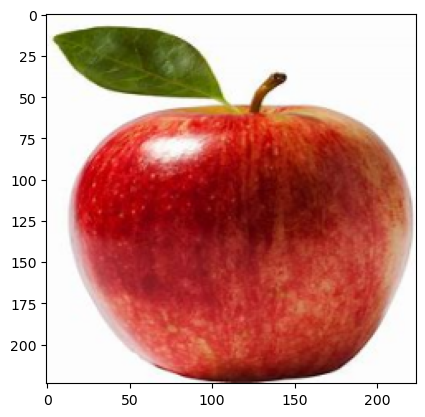

In [61]:
#12-2  캐스 팅 작업  ,  이미지  0 ~ 255 unit8로 변환 하자  !!
#12-3  사이즈 조정해서 이미지 파일로 저장 하자.  
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('img/apple.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img_resize = cv2.resize(img,(224,224))

img_uint8 = img_resize.astype('uint8')

plt.imshow(img_uint8)
plt.show()

#cv2.imwrite('img/resize_apple.jpg',cv2.cvtColor(cv2.COLOR_RGB2BGR))

In [62]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions


x= np.expand_dims(img_uint8,axis=0)
x= preprocess_input(x)

predictions = fifty.predict(x)
print(f'Predictions',decode_predictions(predictions,top=3)[0])


1/1 [==============================] - 0s 106ms/step
Predictions [('n07768694', 'pomegranate', 0.7904764), ('n07742313', 'Granny_Smith', 0.08751991), ('n07747607', 'orange', 0.01747316)]


In [31]:
#print(help(skimage.util.montage))

NameError: name 'skimage' is not defined

In [66]:
#Q13) 레이어를 동결 시켜 보자 

weight_conv2_block3_1_conv_before = fifty.get_layer('conv2_block3_1_conv').get_weights()
weight_conv2_block3_1_bn_before = fifty.get_layer('conv2_block3_1_bn').get_weights()


#레이어 동결
fifty.get_layer('conv2_block3_1_conv').trainable=False
fifty.get_layer('conv2_block3_1_bn').trainable=False
fifty.get_layer('conv2_block3_1_relu').trainable=False


fifty.compile(optimizer = 'adam',loss='categorical_crossentropy')


weight_conv2_block3_1_conv_after = fifty.get_layer('conv2_block3_1_conv').get_weights()
weight_conv2_block3_1_bn_after = fifty.get_layer('conv2_block3_1_bn').get_weights()


print(f'{weight_conv2_block3_1_conv_before} : {weight_conv2_block3_1_conv_after}')
print(f'{weight_conv2_block3_1_bn_before} : {weight_conv2_block3_1_bn_after}')


print(f'{np.array_equal(weight_conv2_block3_1_conv_before,weight_conv2_block3_1_conv_after)}')
print(f'{np.array_equal(weight_conv2_block3_1_bn_before,weight_conv2_block3_1_bn_after)}')
# conv2_block3_1_conv , conv2_block3_1_bn ,conv2_block3_1_relu를 동결 후 가중치를 비교해보자

[array([[[[ 6.4674197e-03,  5.6560319e-03, -7.2610594e-02, ...,
          -1.6278299e-02,  1.8165688e-03,  8.5541680e-02],
         [-3.2519642e-02, -4.0342156e-02, -7.9431264e-03, ...,
          -1.1604636e-02,  1.7219901e-02,  9.6099535e-03],
         [ 2.2244077e-02,  2.8925532e-02, -5.8263787e-03, ...,
           5.4165423e-03,  2.3212612e-02, -2.7895676e-02],
         ...,
         [ 1.3149081e-01, -3.9823350e-02,  4.7879912e-02, ...,
           2.2762209e-02, -7.6685034e-02,  1.9747645e-02],
         [-4.9686518e-02, -3.2732040e-02, -2.6242498e-03, ...,
           2.6855137e-02, -1.2300796e-02, -3.1784617e-05],
         [-6.2238269e-02,  6.8615906e-02, -4.7975942e-03, ...,
          -2.4603404e-02,  5.2041125e-02,  7.3396809e-02]]]],
      dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   